In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)
%matplotlib inline

In [2]:
# ## read from previously saved pickle file
df = pd.read_pickle('/Users/huiru/GADataScience/FinalProject/Data/clean.pkl')
#drop these two columns because not useful
df.drop(['yr_born', 'yr_died'], axis=1, inplace=True)
#drop outliers
df = df.query('numlines < 150')
df = df.query('enj_score < 500')
df = df.query('numstanzas < 50')
df = df.query('avgline_stanza < 100')
df = df.query('title_lesk_abs < 2.0')
df = df.query('conjunction_ratio < 50')
df.drop('25w_nps_fr', axis = 1, inplace = True)

In [3]:
df.columns

Index([        u'poet_name',          u'poet_url',    u'poet_poems_url',
                    u'tags',          u'poet_bio',              u'city',
                   u'state',           u'country',       u'primary_tag',
                    u'tag2',              u'tag3',              u'tag4',
               u'poem_link',        u'poem_yrpub',        u'poem_title',
               u'poem_text',              u'text',          u'numlines',
              u'numstanzas',    u'avgline_stanza',         u'wordcount',
             u'wordcount_d',               u'ttr',             u'yrpub',
             u'sentences_x',     u'num_sentences', u'abstraction_score',
          u'lesk_abs_score',     u'pronoun_score',       u'title_clean',
          u'title_lesk_abs', u'conjunction_ratio',         u'enj_score',
               u'nps_ratio',         u'vps_ratio',         u'aps_ratio',
          u'avg_nps_cscore',    u'avg_vps_cscore',    u'avg_aps_cscore',
              u'10w_nps_fr',        u'11w_nps_fr', 

In [4]:
df.columns

infocols = ['poet_name','poet_url','poet_poems_url','poet_bio','city','state','country','primary_tag','tags','tag2','tag3','tag4','poem_yrpub']
poemcols = ['poem_link', 'poem_title', 'title_clean','poem_text', 'sentences_x']
outcome = ['label', 'strlabel', 'poet_name', 'primary_tag', 'poem_link']

#EXCLUDE wordcount, wordcount_d
numerical = ['yrpub', 'numlines','numstanzas' ,'avgline_stanza','enj_score','ttr',
             'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs', 'conjunction_ratio',
             'nps_ratio','vps_ratio','aps_ratio','avg_nps_cscore','avg_vps_cscore','avg_aps_cscore',
             '1w_nps_fr','2w_nps_fr','3w_nps_fr','4w_nps_fr','5w_nps_fr','6w_nps_fr','7w_nps_fr'
            ,'8w_nps_fr','9w_nps_fr','10w_nps_fr','11w_nps_fr','12w_nps_fr','13w_nps_fr', '14w_nps_fr',
             '15w_nps_fr','17w_nps_fr','18w_nps_fr'
            ]


In [5]:
len(numerical)
# plt.jet()

34

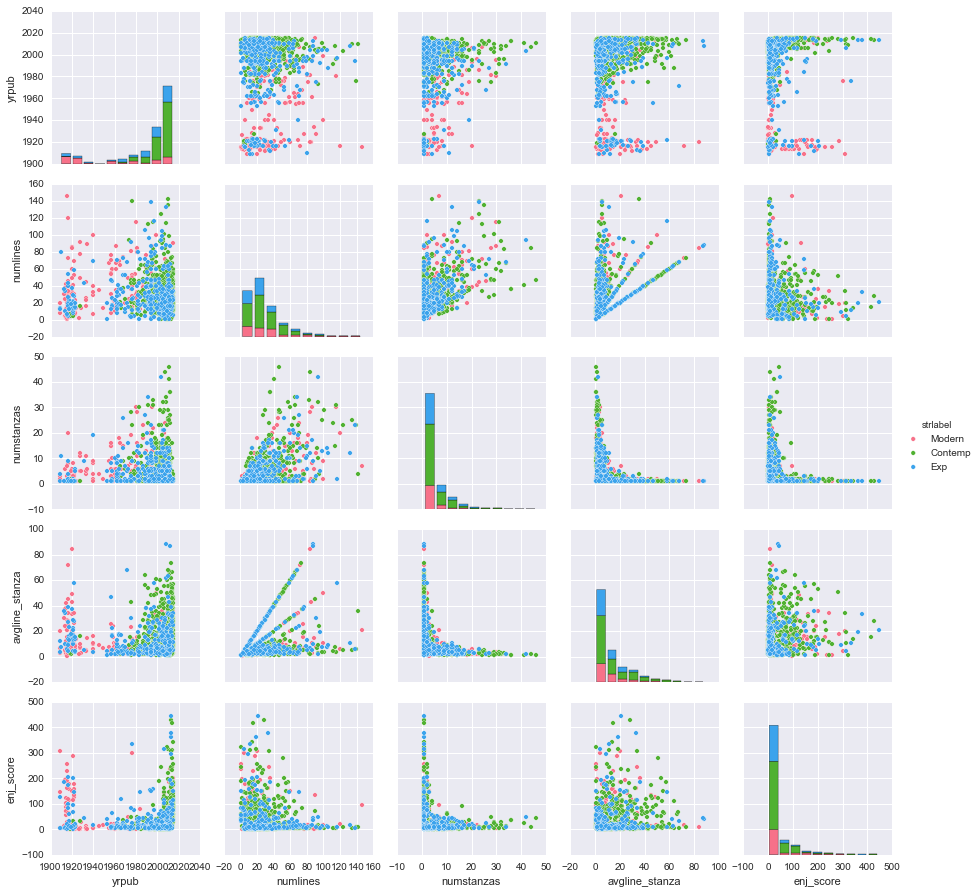

In [6]:
X = df[numerical[:5]]
y = df[outcome[1]]

X = pd.concat([X,y], axis = 1)
# print df2.columns

sns.pairplot(X, hue= 'strlabel', palette='husl')

['ttr', 'abstraction_score', 'lesk_abs_score', 'pronoun_score', 'title_lesk_abs']


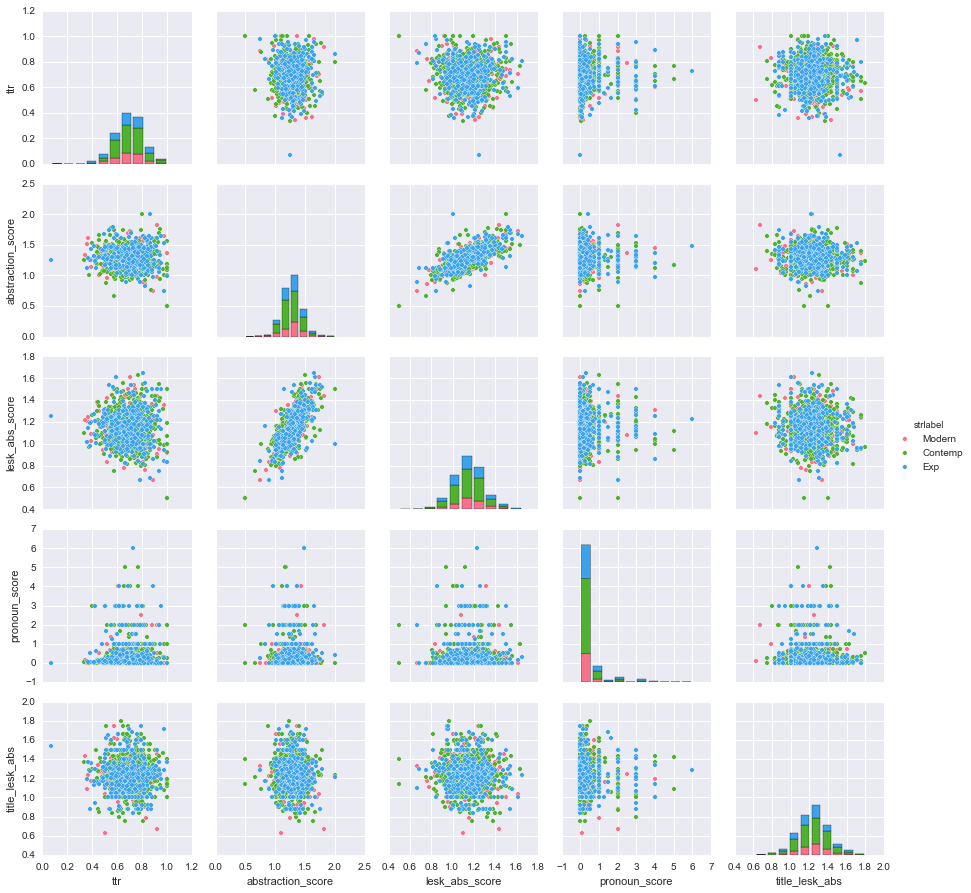

In [7]:
print numerical[5:10]
X = df[numerical[5:10]]
y = df[outcome[1]]

X = pd.concat([X,y], axis = 1)
# print df2.columns

sns.pairplot(X, hue= 'strlabel', palette='husl')

['conjunction_ratio', 'nps_ratio', 'vps_ratio', 'aps_ratio', 'avg_nps_cscore']


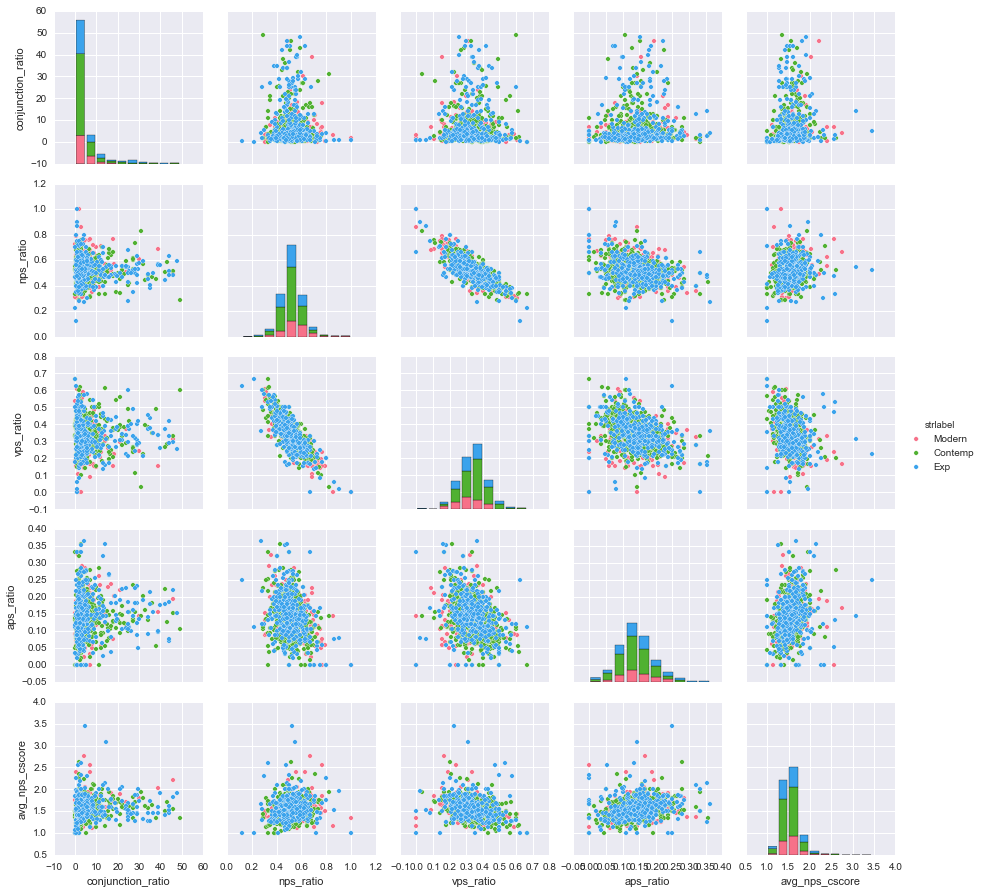

In [8]:
print numerical[10:15]
X = df[numerical[10:15]]
y = df[outcome[1]]

X = pd.concat([X,y], axis = 1)
# print df2.columns

sns.pairplot(X, hue= 'strlabel', palette='husl')

['avg_vps_cscore', 'avg_aps_cscore', '1w_nps_fr', '2w_nps_fr', '3w_nps_fr']


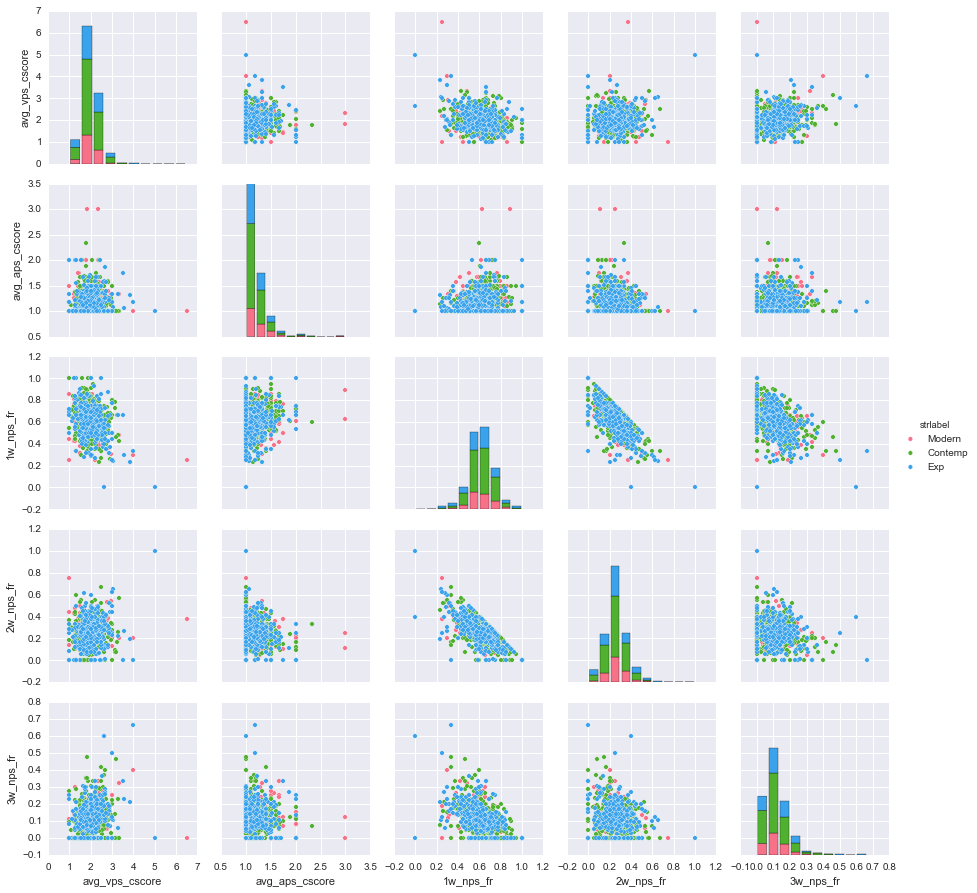

In [9]:
print numerical[15:20]
X = df[numerical[15:20]]
y = df[outcome[1]]

X = pd.concat([X,y], axis = 1)
# print df2.columns

sns.pairplot(X, hue= 'strlabel', palette='husl')

['4w_nps_fr', '5w_nps_fr', '6w_nps_fr', '7w_nps_fr', '8w_nps_fr']


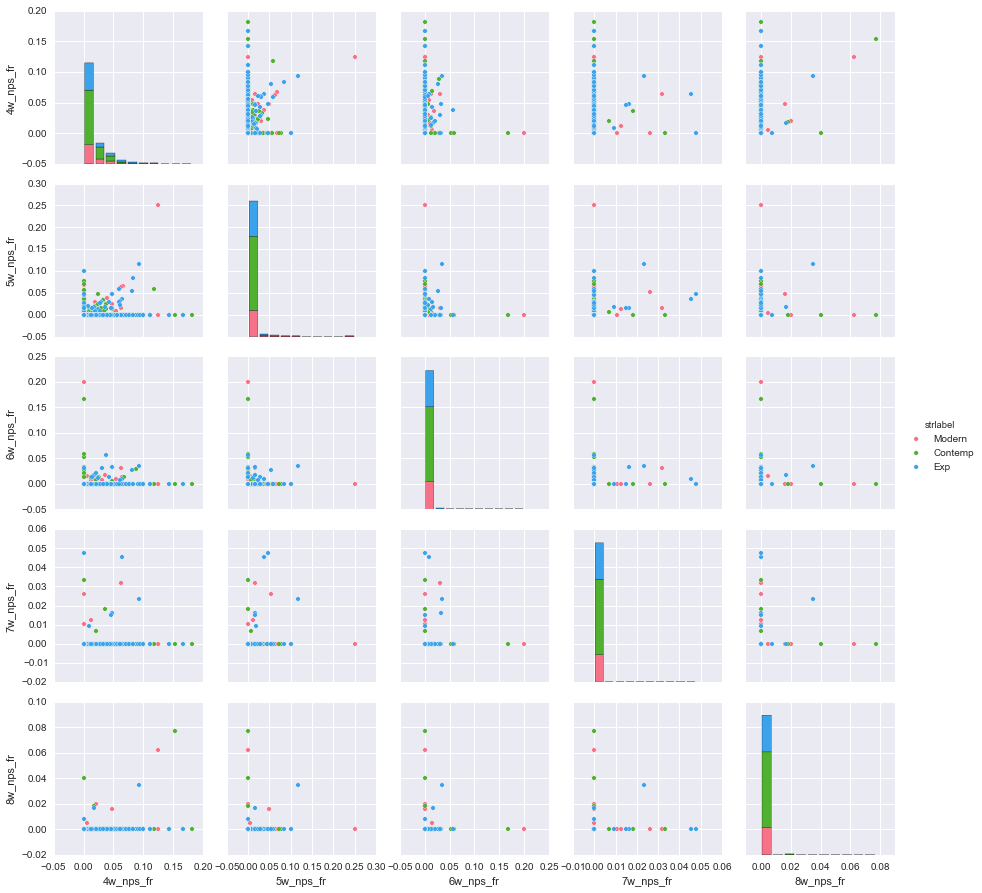

In [10]:
print numerical[20:25]
X = df[numerical[20:25]]
y = df[outcome[1]]

X = pd.concat([X,y], axis = 1)
# print df2.columns

sns.pairplot(X, hue= 'strlabel', palette='husl')

['9w_nps_fr', '10w_nps_fr', '11w_nps_fr', '12w_nps_fr', '13w_nps_fr', '14w_nps_fr', '15w_nps_fr', '17w_nps_fr', '18w_nps_fr']


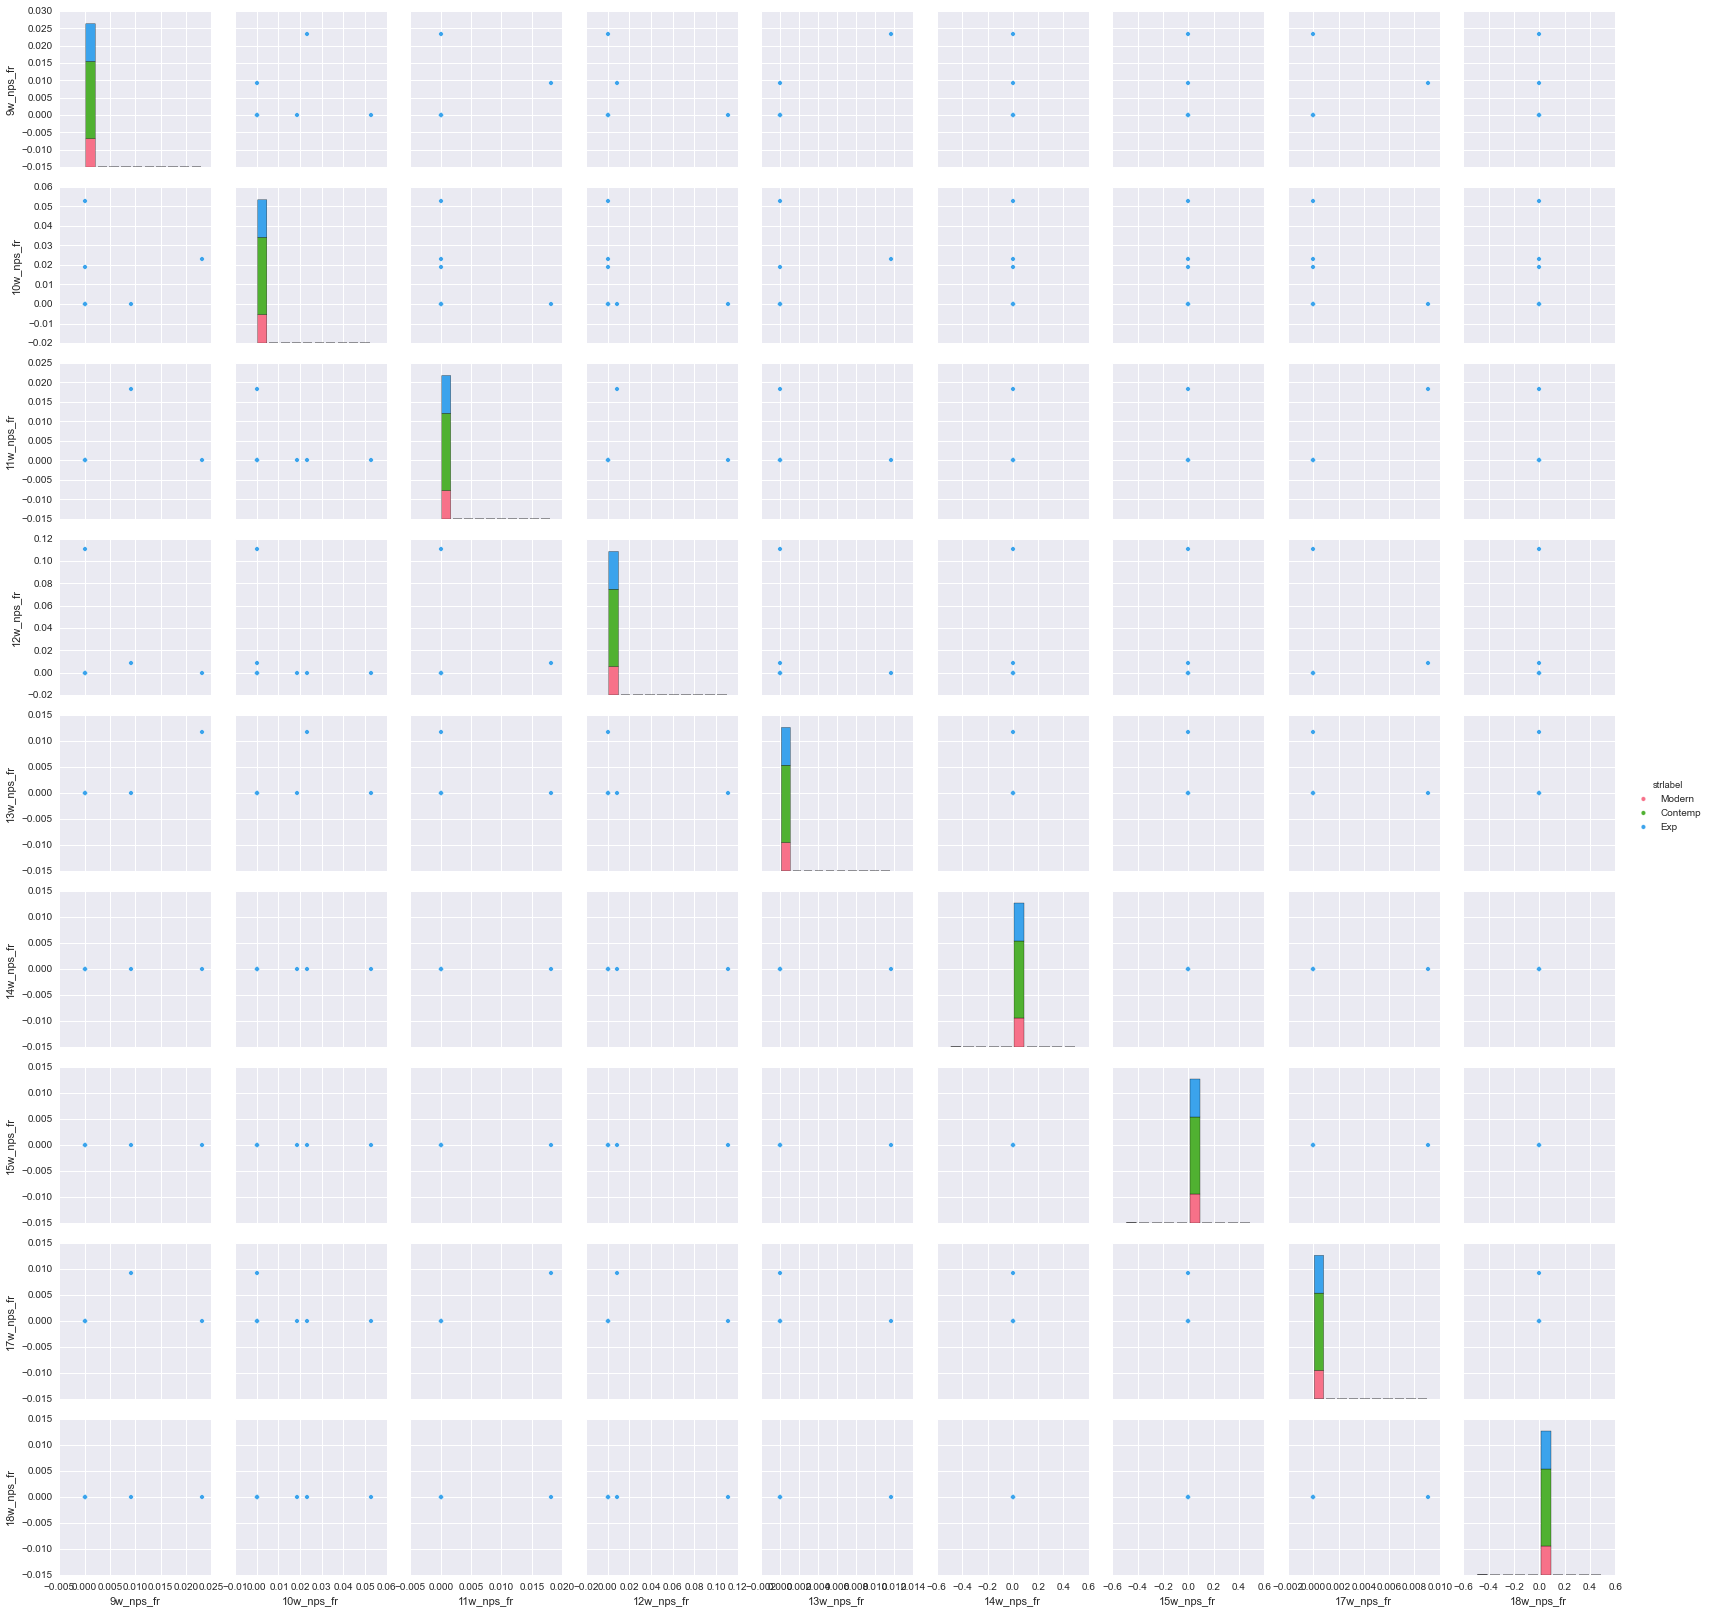

In [11]:
print numerical[25:]
X = df[numerical[25:]]
y = df[outcome[1]]

X = pd.concat([X,y], axis = 1)
# print df2.columns

sns.pairplot(X, hue= 'strlabel', palette='husl')

##from these visualizations I have a better intuition about which variables should be dropped

In [12]:
print numerical[20:]

['4w_nps_fr', '5w_nps_fr', '6w_nps_fr', '7w_nps_fr', '8w_nps_fr', '9w_nps_fr', '10w_nps_fr', '11w_nps_fr', '12w_nps_fr', '13w_nps_fr', '14w_nps_fr', '15w_nps_fr', '17w_nps_fr', '18w_nps_fr']


In [13]:
df.drop(numerical[20:], axis = 1, inplace = True)
df.reset_index(drop=True, inplace = True)

In [14]:
df.to_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansready.pkl')

# A more sophisticated approach

In [15]:
from sklearn.preprocessing import scale
numerical = numerical[:20]

In [16]:
df[numerical].columns
X = df[numerical].as_matrix()
np.var(X, axis = 0)

array([  8.79933537e+02,   4.62006674e+02,   3.70760211e+01,
         1.87930863e+02,   3.25678309e+03,   1.29543328e-02,
         2.59916818e-02,   2.05129836e-02,   4.17680489e-01,
         2.72406081e-02,   4.98663349e+01,   7.28139394e-03,
         7.54944168e-03,   2.91139935e-03,   4.63312214e-02,
         1.73109204e-01,   4.00110385e-02,   1.45518405e-02,
         1.04921341e-02,   5.49437620e-03])

In [17]:
scaler = scale(X)

In [19]:
scaler
scaler.shape

(1287, 20)

In [20]:
scaleddf = pd.DataFrame(scaler)
scaleddf.columns = [numerical[:20]]

In [21]:
# numerical = numerical[:20]
df2 = df.drop(numerical, axis = 1)

In [22]:
# df2.head()
kscaledf = pd.concat([df2,scaleddf],axis =1)

In [23]:
kscaledf.to_pickle('/Users/huiru/GADataScience/FinalProject/Data/kmeansscaled.pkl')